In [1]:
import numpy as np
import pandas as pd
import os
import urllib
import matplotlib.pyplot as plt
import cv2
import glob 
import time
from PIL import Image

In [2]:
df=pd.read_json("/content/drive/MyDrive/License Plate Dataset/Indian_Number_plates.json", lines=True)
df.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [3]:
new_csv=df.to_csv("license_plates.csv", index = False)

In [4]:
ndf=pd.read_csv("/content/license_plates.csv")
ndf.head(10)

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
5,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
6,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
7,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
8,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
9,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [5]:
os.mkdir("Number Plates")

In [6]:
#separate annotations

data = dict()
data["name"] = list()
data["width"] = list()
data["height"] = list()
data["top-x"] = list()
data["top-y"] = list()
data["bottom-x"] = list()
data["bottom-y"] = list()

In [7]:
from urllib.request import urlopen
count = 0
for index, row in df.iterrows():
    img = urllib.request.urlopen(row["content"])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save("Number Plates/car{}.jpeg".format(count), "JPEG")
    
    data["name"].append("car{}".format(count))
    
    d = row["annotation"]
    
    data["width"].append(d[0]["imageWidth"])
    data["height"].append(d[0]["imageHeight"])
    data["top-x"].append(d[0]["points"][0]["x"])
    data["top-y"].append(d[0]["points"][0]["y"])
    data["bottom-x"].append(d[0]["points"][1]["x"])
    data["bottom-y"].append(d[0]["points"][1]["y"])
    
    count += 1

In [8]:
data = pd.DataFrame(data)
data.head()

,name,width,height,top-x,top-y,bottom-x,bottom-y
0,car0,806,466,0.722084,0.587983,0.868486,0.688841
1,car1,494,449,0.161943,0.850780,0.582996,1.000000
2,car2,500,314,0.082000,0.697452,0.230000,0.828025
3,car3,500,469,0.434000,0.667377,0.718000,0.765458
4,car4,1001,563,0.208791,0.390764,0.865135,0.984014


In [9]:
data['name']=data['name']+".jpeg"

In [10]:
data

,name,width,height,top-x,top-y,bottom-x,bottom-y
0,car0.jpeg,806,466,0.722084,0.587983,0.868486,0.688841
1,car1.jpeg,494,449,0.161943,0.850780,0.582996,1.000000
2,car2.jpeg,500,314,0.082000,0.697452,0.230000,0.828025
3,car3.jpeg,500,469,0.434000,0.667377,0.718000,0.765458
4,car4.jpeg,1001,563,0.208791,0.390764,0.865135,0.984014
...,...,...,...,...,...,...,...
232,car232.jpeg,500,366,0.344000,0.609290,0.706000,0.778689
233,car233.jpeg,500,333,0.368000,0.453453,0.616000,0.618619
234,car234.jpeg,500,332,0.334000,0.608434,0.628000,0.768072
235,car235.jpeg,586,331,0.295222,0.601208,0.441980,0.719033


In [11]:
#initializing width and height to 224 which is same as input to vgg16
width = 224
height = 224
channels = 3

In [12]:
def viewimg(t):
    
    img = cv2.imread("Number Plates/" + data["name"].iloc[t])
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dsize=(width,height))
    
    top_x=int(data['top-x'].iloc[t]* width)
    top_y=int(data['top-y'].iloc[t]*height)
    bot_x=int(data['bottom-x'].iloc[t]*height)
    bot_y=int(data['bottom-y'].iloc[t]*height)
    
    
    new_img=cv2.rectangle(img,(top_x,top_y),(bot_x,bot_y),(0, 0, 255), 1)
    
    plt.imshow(new_img)
    
    plt.show()

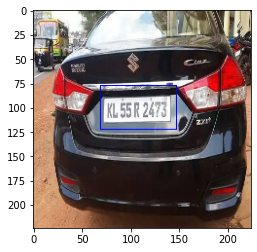

In [13]:
viewimg(10)

In [14]:
#creating test set of 5 images
n = 5
drop_indices = np.random.choice(data.index, n, replace=False)
data_new = data.drop(drop_indices)

In [15]:
data_new

,name,width,height,top-x,top-y,bottom-x,bottom-y
0,car0.jpeg,806,466,0.722084,0.587983,0.868486,0.688841
1,car1.jpeg,494,449,0.161943,0.850780,0.582996,1.000000
2,car2.jpeg,500,314,0.082000,0.697452,0.230000,0.828025
3,car3.jpeg,500,469,0.434000,0.667377,0.718000,0.765458
4,car4.jpeg,1001,563,0.208791,0.390764,0.865135,0.984014
...,...,...,...,...,...,...,...
232,car232.jpeg,500,366,0.344000,0.609290,0.706000,0.778689
233,car233.jpeg,500,333,0.368000,0.453453,0.616000,0.618619
234,car234.jpeg,500,332,0.334000,0.608434,0.628000,0.768072
235,car235.jpeg,586,331,0.295222,0.601208,0.441980,0.719033


In [16]:
drop_indices

array([194,  94, 129,  32,  41])

In [17]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [18]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [19]:
train_generator = datagen.flow_from_dataframe(
    data_new,
    directory="Number Plates/",
    x_col="name",
    y_col=["top-x", "top-y", "bottom-x", "bottom-y"],
    target_size=(width,height),
    batch_size=32, 
    class_mode="raw",
    subset="training")

validation_generator = datagen.flow_from_dataframe(
    data_new,
    directory="Number Plates/",
    x_col="name",
    y_col=["top-x", "top-y", "bottom-x", "bottom-y"],
    target_size=(width,height),
    batch_size=32, 
    class_mode="raw",
    subset="validation")

Found 209 validated image filenames.
Found 23 validated image filenames.


In [20]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(width,height,channels)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

58892288/58889256 [==============================] - 1s 0us/step


In [21]:
import tensorflow as tf
import tempfile

def add_regularization(model, regularizer=tf.keras.regularizers.l2(0.0001)):

    if not isinstance(regularizer, tf.keras.regularizers.Regularizer):
      print("Regularizer must be a subclass of tf.keras.regularizers.Regularizer")
      return model

    for layer in model.layers:
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
              setattr(layer, attr, regularizer)

    # When we change the layers attributes, the change only happens in the model config file
    model_json = model.to_json()

    # Save the weights before reloading the model.
    tmp_weights_path = os.path.join(tempfile.gettempdir(), 'tmp_weights.h5')
    model.save_weights(tmp_weights_path)

    # load the model from the config
    model = tf.keras.models.model_from_json(model_json)
    
    # Reload the model weights
    model.load_weights(tmp_weights_path, by_name=True)
    return model

In [22]:
model = add_regularization(model)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 21,178,884
Trainable params: 21,178,884
Non-trainable params: 0
____________________________________________

In [24]:
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss="mse",metrics=['accuracy'])


In [25]:
history = model.fit_generator(train_generator,
    steps_per_epoch=7, #size/batchsize
    validation_data=validation_generator,
    validation_steps=1,
    epochs=7)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/7
7/7 [==============================] - 6s 871ms/step - loss: 0.1138 - accuracy: 0.4928 - val_loss: 0.1005 - val_accuracy: 0.4783
Epoch 2/7
7/7 [==============================] - 3s 405ms/step - loss: 0.0893 - accuracy: 0.7416 - val_loss: 0.0926 - val_accuracy: 0.7391
Epoch 3/7
7/7 [==============================] - 3s 404ms/step - loss: 0.0818 - accuracy: 0.8373 - val_loss: 0.0839 - val_accuracy: 0.8261
Epoch 4/7
7/7 [==============================] - 3s 403ms/step - loss: 0.0749 - accuracy: 0.8708 - val_loss: 0.0813 - val_accuracy: 0.7826
Epoch 5/7
7/7 [==============================] - 3s 411ms/step - loss: 0.0707 - accuracy: 0.8900 - val_loss: 0.0773 - val_accuracy: 0.8696
Epoch 6/7
7/7 [==============================] - 3s 419ms/step - loss: 0.0677 - accuracy: 0.9187 - val_loss: 0.0739 - val_accuracy: 0.8696
Epoch 7/7
7/7 [==============================] - 3s 399ms/step - loss: 0.0651 - accuracy: 

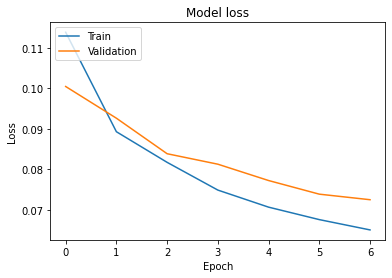

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

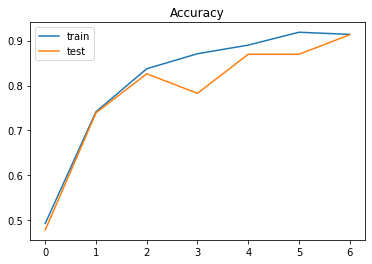

In [27]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [28]:
#to test model by checking if bounding boxes created provide satisfactory results
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,399 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [29]:
import pytesseract
from PIL import Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


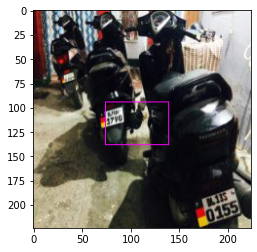

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Car Number is We |



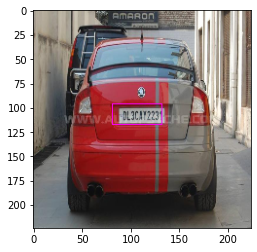

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Car Number is NIN



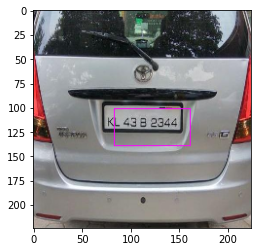

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Car Number is 


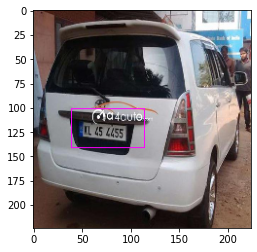

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Car Number is EF



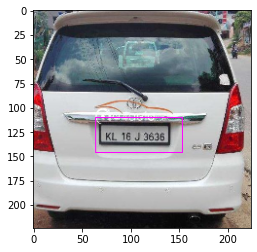

The Car Number is  



In [31]:
for idx, row in data.iloc[drop_indices].iterrows():    
    
    img = cv2.resize(cv2.imread("Number Plates/" + row['name']) / 255.0, dsize=(width,height))
    y_hat = model.predict(img.reshape(1, width,height, 3)).reshape(-1) * width
    
    xt, yt = y_hat[0], y_hat[1]
    xb, yb = y_hat[2], y_hat[3]
    
    img = cv2.cvtColor(img.astype(np.float32),cv2.COLOR_BGR2RGB)
    image = cv2.rectangle(img, (xt, yt), (xb, yb), (255,0,255), 1)
    
    clone = image.copy() 
    
    # Cropping the predicted reactangle region into a new image
    crop_img = clone[int(yt):int(yb),int(xt):int(xb)] 
   
    plt.imshow(clone)
    #plt.show(crop_img) for viewing just bounding box
    im = Image.fromarray((crop_img * 255).astype(np.uint8))
    
    
   
    plt.show()
    ## Detecting Car Number using pytesseract
    car_number = pytesseract.image_to_string(im, lang="eng")
    
    print("The Car Number is",car_number)

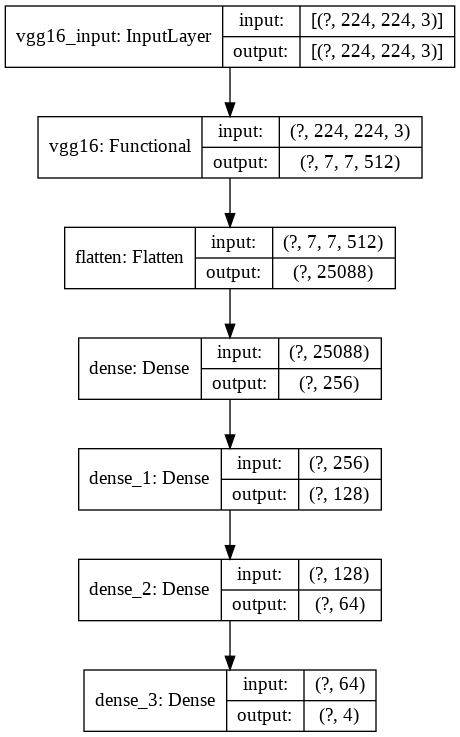

In [33]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

We can see that using the vgg16 model the license plate localization takes place to an extent but due to the size of the training set and low quality of images, ocr is unable to read the license plate for most of the images